# Project: Gapminder EU Development and GNI Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Topic**:
In this report, I will explore growth in the EU and the relation between the GNI and the population, income per person, and unemployment rates from 1999 to 2018 for the top 5 populated countries in the EU.
I will be using data sets from the Gapminder website. <br /><br />My dependent variable will be GNI and population, income per person, and unemployment rates will be independent variables. I will also create a growth variable for all of the variables to explore how they have developed over time.

> **Questions**: 
- Out of the top 5 countries by population in the EU, which have had a higher growth on average from 1999 to 2018 in GNI, population, income per capita and unemployment?
- Is there any correlation between GNI and population, income per capita or unemployment?

> **About the data sets**
- GNI: This indicator provides values for gross national income (GNI. Formerly GNP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. Gross national income is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. PPP conversion factor is a spatial price deflator and currency converter that eliminates the effects of the differences in price levels between countries. More information [here](https://data.worldbank.org/indicator/NY.GNP.MKTP.PP.CD)
- Population: This data set uses UN POP from their  World Population Prospects 2019 published in the file with annually interpolated demographic indicators, called WPP2019_INT_F01_ANNUAL_DEMOGRAPHIC_INDICATORS.xlsx, accessed on October 14, 2019. More information [here](https://www.gapminder.org/data/documentation/gd003/)
- Unemployment: Measures the unemployment rate in percentages by country. The data is collected by ILOSTAT. More information can be found [here](https://www.ilo.org/shinyapps/bulkexplorer36/?lang=en&segment=indicator&id=SDG_0852_SEX_AGE_RT_A)
- Income per Capita: This data set is based on the GDP data set, used to calculate the income per person for each country in international dollars and inflation adjusted. More information [here](https://www.gapminder.org/data/documentation/gd001/)


In [1]:
# import packages and set decimal precision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('precision', 3)

<a id='wrangling'></a>
## Data Wrangling

> I have downloaded 4 data sets from the Gapminder website. My goal is to combine all data sets into one and narrow down its scope to focus on today's top 5 EU member countries by population in the period from 1999-2018 (20 years).

In [2]:
# load csv files: Population, GNI, Income per Capita, Unemployment Rate
pop_raw = pd.read_csv('population_total.csv')
gni_raw = pd.read_csv('total_gni_ppp_current_international.csv')
inc_raw = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
unem_raw = pd.read_csv('sl_uem_totl_ne_zs.csv')

In [3]:
# filter for the top 5 members of the EU according to population for the period 1999-2018
eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

# filter by period including the "country" column
pop_20 = pop_raw.iloc[:, np.r_[0:1, 200:220]]

# filter by EU members
pop_20_eu = pop_20[pop_20['country'].isin(eu)]

# sort and filter top 5 countries by population
pop_20_eu_top5 = pop_20_eu.sort_values(by='2018', ascending=False).iloc[:5]


In [4]:
# check if the previous code worked
pop_20_eu_top5

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
63,Germany,81400000,81400000,81500000,81500000,81600000,81600000,81600000,81500000,81300000,...,80900000,80800000,80900000,81000000,81200000,81500000,81800000,82200000,82700000,83100000
59,France,58700000,59000000,59400000,59800000,60300000,60700000,61100000,61500000,61900000,...,62500000,62900000,63200000,63600000,63900000,64200000,64500000,64700000,64800000,65000000
82,Italy,56700000,56700000,56900000,57200000,57600000,57900000,58300000,58500000,58700000,...,59100000,59300000,59600000,59900000,60200000,60400000,60600000,60700000,60700000,60600000
160,Spain,40500000,40800000,41300000,41900000,42600000,43300000,44000000,44700000,45400000,...,46600000,46900000,47100000,47100000,46900000,46800000,46700000,46600000,46600000,46700000
138,Poland,38600000,38600000,38500000,38500000,38400000,38400000,38400000,38400000,38400000,...,38400000,38300000,38300000,38200000,38200000,38100000,38000000,38000000,38000000,37900000


In [5]:
# use pd.melt to transform the dataframes to include the year columns as row values

pop = pd.melt(pop_20_eu_top5, id_vars=['country'], value_vars=list(pop_20_eu_top5.columns)[1:],var_name='year', value_name='population').sort_values('country')

gni = pd.melt(gni_raw, id_vars=['country'], value_vars=list(gni_raw.columns)[1:],var_name='year', value_name='gni').sort_values('country')

inc = pd.melt(inc_raw, id_vars=['country'], value_vars=list(inc_raw.columns)[1:],var_name='year', value_name='income').sort_values('country')

unem = pd.melt(unem_raw, id_vars=['country'], value_vars=list(unem_raw.columns)[1:],var_name='year', value_name='unemployment').sort_values('country')


In [6]:
# create the final dataframe by merging all of the individual dataframes

df1 = pd.merge(pop, gni,  how='left', left_on=['country','year'], right_on = ['country','year'])

df2 = pd.merge(df1, inc,  how='left', left_on=['country','year'], right_on = ['country','year'])

df = pd.merge(df2, unem,  how='left', left_on=['country','year'], right_on = ['country','year'])


In [7]:
#check the previous code worked

df.head()

,country,year,population,gni,income,unemployment
0,France,2017,64800000,3.030e+12,39000,9.40
1,France,2015,64500000,2.780e+12,37800,10.40
2,France,2004,60700000,1.850e+12,36100,8.91
3,France,2016,64700000,2.870e+12,38100,10.10
4,France,2006,61500000,2.100e+12,37000,8.45


In [8]:
# check that there are no missing values and that the types are right

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       100 non-null    object 
 1   year          100 non-null    object 
 2   population    100 non-null    int64  
 3   gni           100 non-null    float64
 4   income        100 non-null    int64  
 5   unemployment  100 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.5+ KB


In [9]:
#check for duplicates

df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Outline**: 
- First, I will create a growth variable for each of the existing variables and I will look into the mean of each variable and compare their growth by country to answer the first research question.
- Then, I will explore the variables and the relations among them by looking at a general overview of the variables plotted and then I will dive deeper into them and their relations, to answer the second research question.

### Research Question 1
Out of the top 5 countries by population in the EU, which have had a higher growth on average from 1999 to 2018 in GNI, population, income per capita and unemployment?

In [10]:
# create growth variables

df[['population_growth', 'gni_growth', 'income_growth', 'unemployment_growth']] = df.sort_values(['year']).groupby('country')[['population', 'gni','income', 'unemployment']].pct_change()

In [11]:
# check the previous code worked

df.head()

,country,year,population,gni,income,unemployment,population_growth,gni_growth,income_growth,unemployment_growth
0,France,2017,64800000,3.030e+12,39000,9.40,0.002,0.056,0.024,-0.069
1,France,2015,64500000,2.780e+12,37800,10.40,0.005,0.022,0.005,0.010
2,France,2004,60700000,1.850e+12,36100,8.91,0.007,0.045,0.023,0.072
3,France,2016,64700000,2.870e+12,38100,10.10,0.003,0.032,0.008,-0.029
4,France,2006,61500000,2.100e+12,37000,8.45,0.007,0.071,0.016,-0.005


In [12]:
# create a data frame with the averages by country
df_growth_mean = df.groupby('country')[['population_growth', 'gni_growth', 'income_growth', 'unemployment_growth']].mean()
df_growth_mean

,population_growth,gni_growth,income_growth,unemployment_growth
country,,,,
France,5.381e-03,0.039,8.779e-03,-1.104e-02
Germany,1.092e-03,0.040,1.353e-02,-4.559e-02
Italy,3.510e-03,0.031,9.793e-04,-4.070e-05
Poland,-9.620e-04,0.059,3.921e-02,-4.510e-02
Spain,7.554e-03,0.046,1.111e-02,1.508e-02


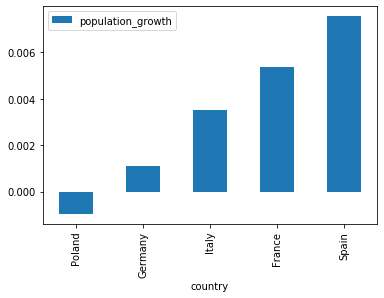

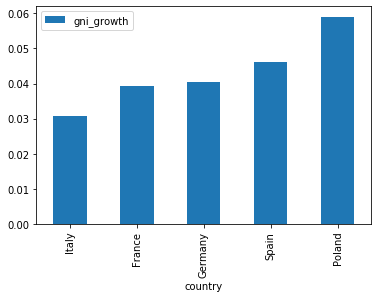

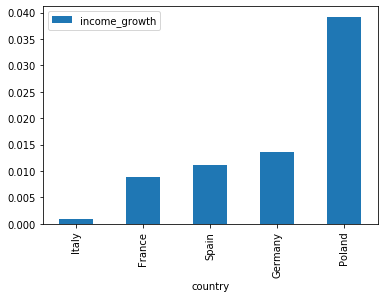

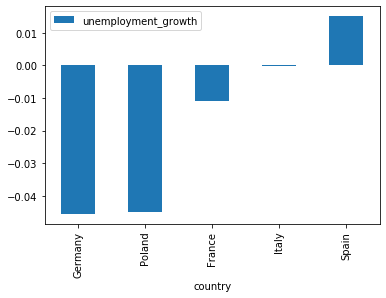

In [13]:
# use a for loop to plot bar charts for each variable
for i in range(len(df_growth_mean.columns)):
    df_growth_mean.sort_values(df_growth_mean.columns[i]).plot(y=df_growth_mean.columns[i], kind='bar', sort_columns=True)

**Population Growth**: On average for the selected period, Spain has been the country to grow the most, followed by France. Poland has a negative average population growth for this period and Germany is the country with the lowest average population growth for the period selected.
<br /><br />
**GNI Growth**: Poland is the country with the highest average GNI growth followed by Spain. Germany and France have a similar average growth. Italy has the lowest average growth.
<br /><br />
**Income Growth**: Poland's income per capita average growth is far higher compare to the other countries, more than doubling Germany's average income per capita growth, which is second. France and Spain have an income per capita average growth which is around 4 times lower than Poland's. Italy's has clearly the lowest.
<br /><br />
**Unemployment Growth**: Unemployment figures are quite different from the previous variables. Spain is the only country with an average unemployment growth rate. Italy is close to zero on the negative side, as well as France. Germany and Poland have on average been reducing unemployment in the selected period.


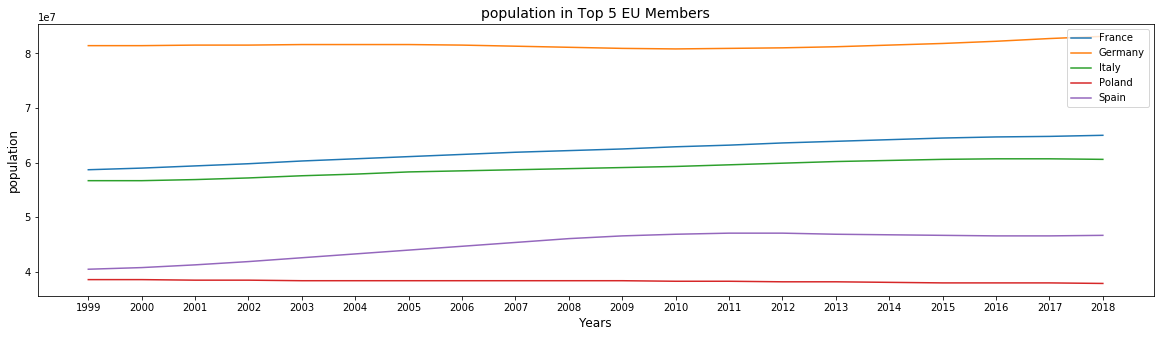

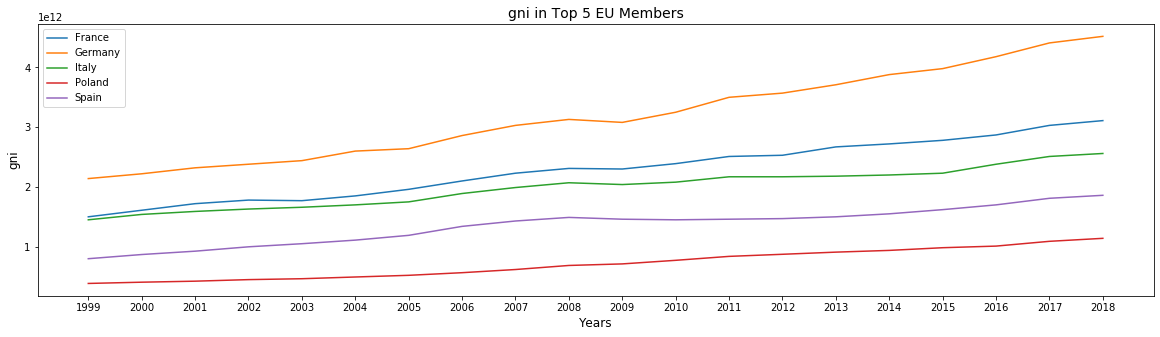

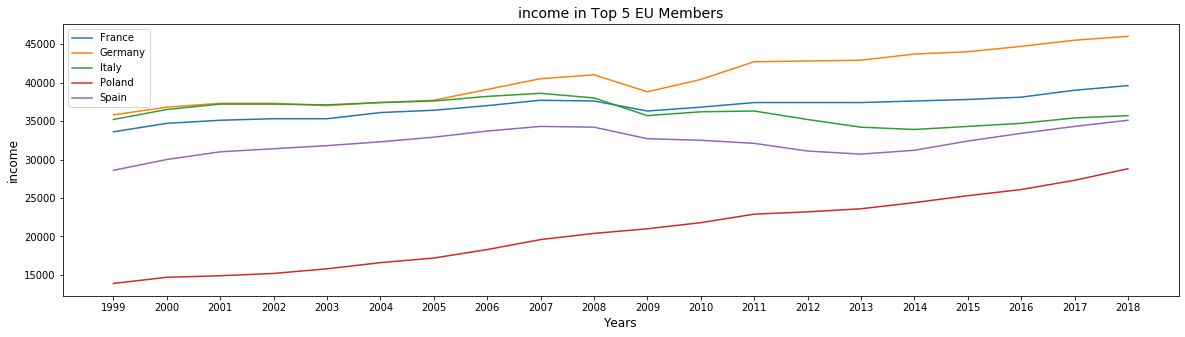

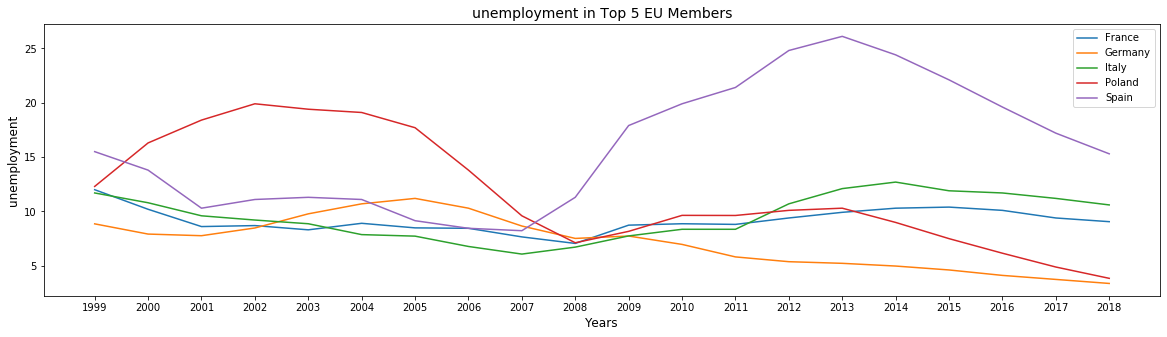

In [14]:
# use two for loops to create a line chart for each variable

for i in range(2,6):
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(111)
    column_plot = df.columns[i]
    for j in range(len(df.country.unique())):
        country_plot = df.country.unique()[j]
        ax.plot(sorted(df['year'].unique()), df[df['country'] == country_plot].sort_values('year')[column_plot])
        ax.legend(list(df.country.unique()))
        ax.set_xlabel('Years', fontsize=12)
        ax.set_ylabel(column_plot, fontsize=12)
        ax.set_title('{} in Top 5 EU Members'.format(column_plot), fontsize=14);



Looking at the population, GNI, income per capita and unemployment data for each year in the selected period, we get a more nuanced overview of the development for each country. I will point some of those out here:
<br /><br />
**GNI**: On average, Poland's and Spain's GNI growth was higher than Germany. However, when we look at the line chart, we can see that Germany has more than doubled their GNI, even though it seems to have had greater drops than the rest of countries.
<br /><br />
**Unemployment**: In my view, the unemployment line chart is where we can see most of the nuances than remain hidden in the bar chart with the unemployment average growth. Displaying the data with a line chart for each year, shows how Poland had a steep increase of unemployement from 1999 to 2000, and from there on a quite irregular trajectory until 2013. On the contrary, Spain had a similar unemployment rate during the early 2000s to Germany, Italy and France (even lower than Germany's at some point). However, in 2007 unemployment rate more than doubled (probably related to the 2007 Financial Crisis)

### Research Question 2
I there any correlation between GNI and population, income per capita or unemployment?

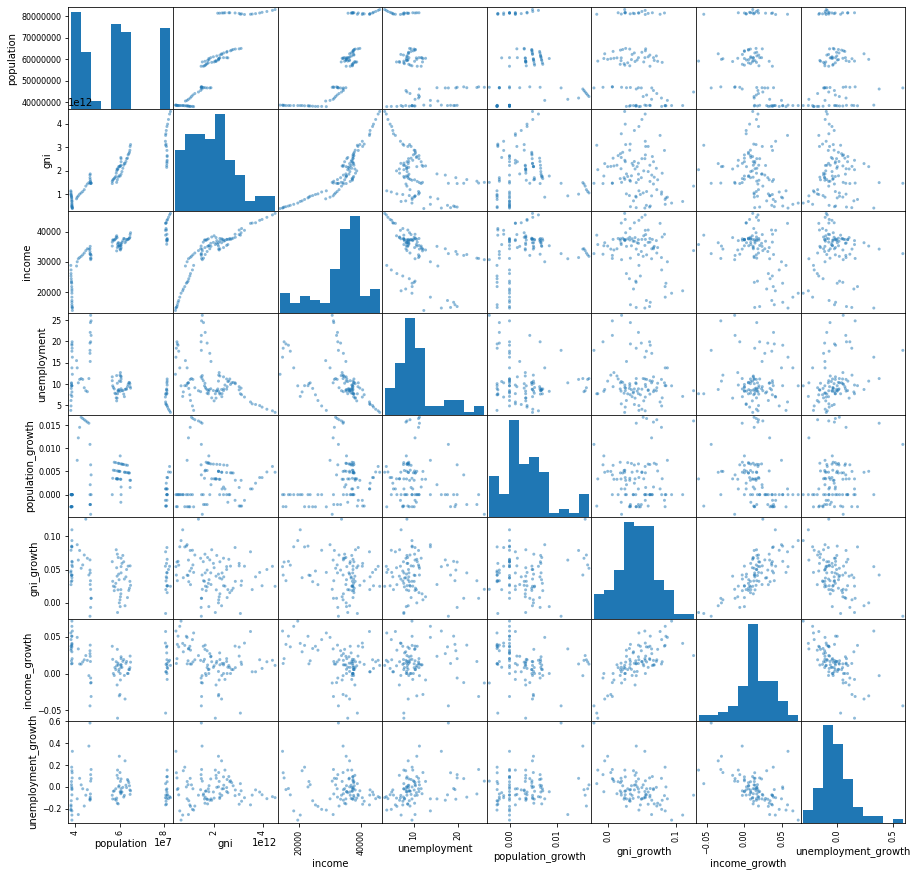

In [15]:
# create an overview of the whole dataframe

pd.plotting.scatter_matrix(df, figsize=(15, 15));

Looking at this overview, I can already see that there are some possible correlations between GNI, population, income per capita and unemployment. To look at this closer, I will use Pearson's correlation coefficient and create a heat map to get a better visualiztion.

In [16]:
# calculate Pearson's correlation coefficient
df_corr = df.corr(method ='pearson')
df_corr

,population,gni,income,unemployment,population_growth,gni_growth,income_growth,unemployment_growth
population,1.000,0.901,0.817,-0.471,-0.068,-0.244,-0.304,-0.022
gni,0.901,1.000,0.874,-0.475,-0.014,-0.258,-0.306,-0.061
income,0.817,0.874,1.000,-0.474,0.260,-0.256,-0.406,-0.071
unemployment,-0.471,-0.475,-0.474,1.000,-0.193,-0.146,-0.050,0.297
population_growth,-0.068,-0.014,0.260,-0.193,1.000,0.072,-0.237,0.163
gni_growth,-0.244,-0.258,-0.256,-0.146,0.072,1.000,0.739,-0.486
income_growth,-0.304,-0.306,-0.406,-0.050,-0.237,0.739,1.000,-0.592
unemployment_growth,-0.022,-0.061,-0.071,0.297,0.163,-0.486,-0.592,1.000


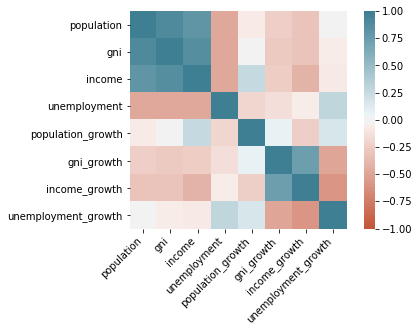

In [17]:
# create a heat map of correlation coefficients
ax = sns.heatmap(
    df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There are some interesting correlations that I will take a closer look at below.

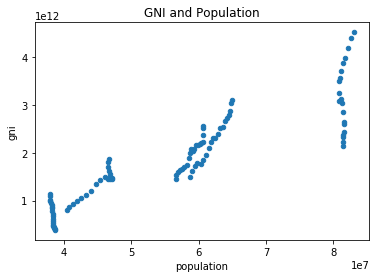

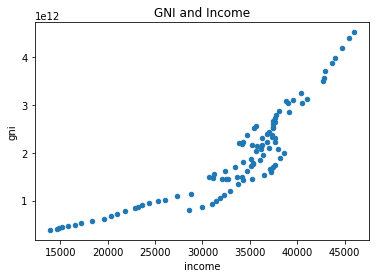

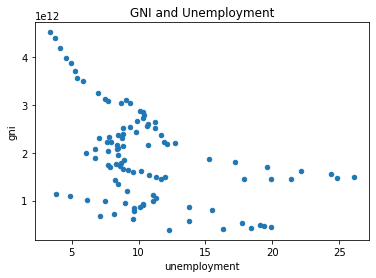

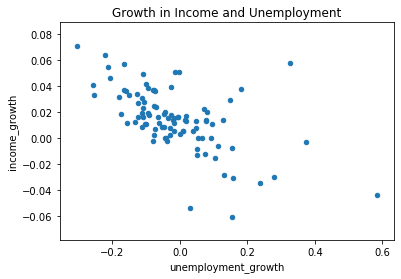

In [18]:
# plot some of the correlations that are relevant to the research question and look promising
df.plot(x='population', y='gni', kind='scatter', title= "GNI and Population");
df.plot(x='income', y='gni', kind='scatter', title= "GNI and Income");
df.plot(x='unemployment', y='gni', kind='scatter', title= "GNI and Unemployment");
df.plot(x='unemployment_growth', y='income_growth', kind='scatter', title= "Growth in Income and Unemployment");

**Comments on Correlations**:
<br /><br />
- There are **strong positive** correlations between **GNI and population** and **GNI and income per capita**.
<br /><br />
- **GNI and unemployment** have a **moderate negative** correlation.
<br /><br />
- Another **moderate-strong negative** correlation that appeared in this exploration is between ***Income growth and Unemployment growth**

<a id='limitations'></a>
## Limitations

The collection of data represented a challenge, because it was not possible to access a ready-made CSV file, and I had to combine different data from different files, transform the structure of the dataframe and merge all of the data into a single dataframe.

The original files had missing data. However, there was no missing data for the variables and my scope of interest.

For some variables, there was only data until 2018. Therefore, I could not include data for a more recent period (2019 or 2020). But, the data in general was sufficient, and there was also data for previous years than 1999, as well as more countries to look into.

To calculate the correlations, I used Pearson's correlation coefficient. It is recommended to use around 8-10 data points per variable to achieve a meaningful result [(source)](https://www.itrcweb.org/gsmc-1/Content/GW%20Stats/5%20Methods%20in%20indiv%20Topics/5%2012%20Sample%20Correlation%20Pearson%20and%20Spearman.htm#:~:text=A%20minimum%20of%20two%20variables%20with%20at%20least%208%20to,are%20skewed%20or%20contain%20nondetects.), and I used between 95 and 100.

<a id='conclusions'></a>
## Conclusions

> **Summary**

- **Question 1**: Out of the top 5 countries by population in the EU, which have had a higher growth on average from 1999 to 2018 in GNI, population, income per capita and unemployment?
<br />
Looking at the limited data we selected, we can see that Germany and Poland have been the countries with a higher positive growth. They are also the countries which have reduced unemployment the most.
<br /><br />
The greatest variations are seen in the unemployment rates, when we look at Poland and Spain.
<br /><br />
We can also tell that Germany's GNI growth has been the highest looking at the line chart, even though Spain's and Poland's where higher on average.
<br /><br />

- **Question 2**: I there any correlation between GNI and population, income per capita or unemployment?
<br />
The data shows that there is a strong positive correlations between GNI and population and GNI and income per capita.
<br /><br />
It also shows that there is a moderate correlation between GNI and unemployment. Additionally, we could see a moderate-strong negative correlation between Income growth and Unemployment growth.
